In [113]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

/tmp/ipykernel_2791929/3615017102.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [115]:
#import symbol
symbols = ["AX","INTC","MCD","PG","WMT", "SPY", "JPM", "CL", "NKE", "V", "COST", "DPZ"] 
stocks = yf.download(symbols, start="2015-01-01", end="2024-01-01")

[*********************100%***********************]  12 of 12 completed


In [116]:
stocks = stocks.loc["2015-01-02":"2022-01-02"]

In [117]:
stocks.head()

Adj Close                                                          \
                  AX    CL   COST   DPZ  INTC   JPM   MCD   NKE    PG    SPY   
Date                                                                           
2015-01-02     19.15 55.24 115.05 85.61 28.07 48.27 73.18 42.76 69.09 174.27   
2015-01-05     19.06 54.83 113.74 86.69 27.76 46.77 72.37 42.07 68.76 171.12   
2015-01-06     19.05 54.26 115.24 85.61 27.24 45.56 72.50 41.82 68.45 169.51   
2015-01-07     19.69 54.69 117.25 88.53 27.81 45.63 73.77 42.69 68.81 171.62   
2015-01-08     20.42 55.43 118.26 91.51 28.33 46.65 74.04 43.67 69.59 174.66   

            ...   Volume                                                \
            ...     COST     DPZ      INTC       JPM      MCD      NKE   
Date        ...                                                          
2015-01-02  ...  1471000  400800  23605600  12600000  6019700  4985800   
2015-01-05  ...  1748500  570800  32785000  20100600  6211900  6889200   
2015-01-06  ...  3185200  727800  30847600  29074100  6484100  7576000   
2015-01-07  ...  2171600  624600  27725200  23843200  6400300  7256000   
2015-01-08  ...  2937700  706100  31765400  16971100  5476700  5978200   

                                                    
                 PG        SPY         V       WMT  
Date                                                
2015-01-02  7251400  121465900   8389600  13505400  
2015-01-05  8626100  169632600  12751200  20937000  
2015-01-06  7791200  209151400  11070000  24615300  
2015-01-07  5986600  125346700   9346800  25495200  
2015-01-08  6823300  147217800  10443200  38140800  

[5 rows x 72 columns]

In [118]:
stocks.tail()

Adj Close                                                        \
                  AX    CL   COST    DPZ  INTC    JPM    MCD    NKE     PG   
Date                                                                         
2021-12-27     55.81 78.93 541.50 541.09 48.48 147.11 253.46 162.47 152.18   
2021-12-28     56.20 79.45 542.62 541.63 48.31 147.56 253.12 161.34 153.00   
2021-12-29     56.16 79.87 545.63 546.13 48.38 147.48 253.69 163.63 154.27   
2021-12-30     55.41 79.57 541.92 541.28 48.29 147.41 252.49 162.38 152.94   
2021-12-31     55.91 80.28 545.57 548.00 48.07 147.29 253.30 161.58 153.70   

                   ...   Volume                                               \
              SPY  ...     COST     DPZ      INTC      JPM      MCD      NKE   
Date               ...                                                         
2021-12-27 461.18  ...  2262900  477600  20985400  6188100  1485500  3769300   
2021-12-28 460.80  ...  1155000  189800  19290400  6342300  1304000  2658600   
2021-12-29 461.39  ...  1753000  258400  14174800  6398900  1318500  3830900   
2021-12-30 460.11  ...  1338700  231600  18359400  6948200  1714600  2666800   
2021-12-31 458.95  ...  1509200  297400  16319000  5805900  1519200  2752000   

                                                  
                 PG       SPY        V       WMT  
Date                                              
2021-12-27  4548600  56808600  4818400  16040700  
2021-12-28  5929400  47274600  4279800  15783000  
2021-12-29  5346100  54503000  3223100  13045200  
2021-12-30  5911500  55329000  3812800  14949000  
2021-12-31  5327000  65237400  4723300  17947800  

[5 rows x 72 columns]

In [119]:
#run the cell!
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [120]:
ret = stocks["Close"].pct_change().dropna()

In [121]:
ret.head()

,AX,CL,COST,DPZ,INTC,JPM,MCD,NKE,PG,SPY,V,WMT
Date,,,,,,,,,,,,
2015-01-05,-0.00,-0.01,-0.01,0.01,-0.01,-0.03,-0.01,-0.02,-0.00,-0.02,-0.02,-0.00
2015-01-06,-0.00,-0.01,0.01,-0.01,-0.02,-0.03,0.00,-0.01,-0.00,-0.01,-0.01,0.01
2015-01-07,0.03,0.01,0.02,0.03,0.02,0.00,0.02,0.02,0.01,0.01,0.01,0.03
2015-01-08,0.04,0.01,0.01,0.03,0.02,0.02,0.00,0.02,0.01,0.02,0.01,0.02
2015-01-09,-0.02,-0.01,-0.02,-0.00,0.00,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


In [122]:
summary = ann_risk_return(ret)

In [123]:
summary

,Return,Risk
AX,0.26,0.46
CL,0.05,0.20
COST,0.22,0.21
DPZ,0.30,0.29
INTC,0.10,0.32
JPM,0.17,0.28
MCD,0.17,0.22
NKE,0.22,0.27
PG,0.10,0.19
SPY,0.14,0.18


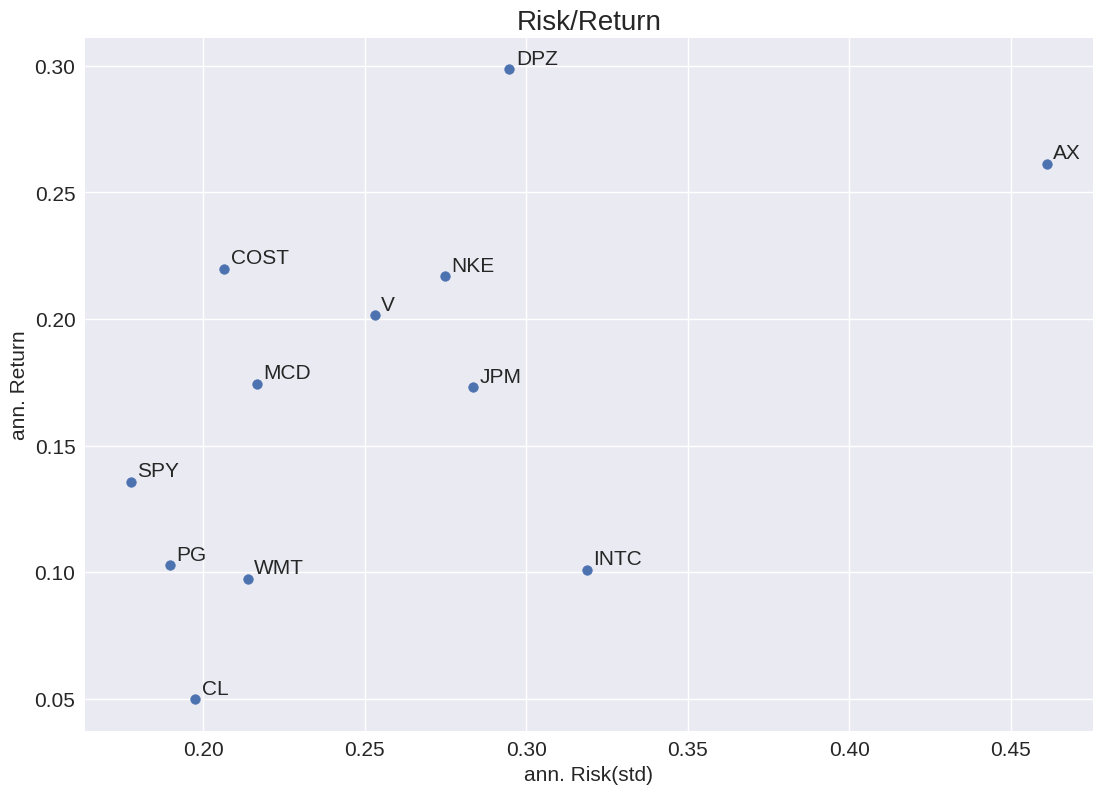

In [124]:
#run the cell!
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [125]:
noa = len(stocks["Close"].columns)
nop = 10000
print(noa, nop)

12 10000


In [126]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [127]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [128]:
weights

array([[0.10691519, 0.04392533, 0.03482403, ..., 0.06019407, 0.05268136,
        0.11191663],
       [0.07465156, 0.01015807, 0.06775309, ..., 0.14458601, 0.12331314,
        0.10400535],
       [0.15213851, 0.06801154, 0.07618865, ..., 0.10396457, 0.0896751 ,
        0.06575873],
       ...,
       [0.08177712, 0.12497295, 0.11124767, ..., 0.00976975, 0.03334334,
        0.03285738],
       [0.10749286, 0.09108775, 0.13718667, ..., 0.07288287, 0.08170307,
        0.02031471],
       [0.00933594, 0.00194312, 0.18047516, ..., 0.11130473, 0.12782134,
        0.19699161]])

In [129]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [130]:
port_ret = ret.dot(weights.T)

In [131]:
port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2015-01-06,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,...,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00
2015-01-07,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2015-01-08,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2015-01-09,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


In [132]:
port_summary = ann_risk_return(port_ret)

In [133]:
port_summary.tail()

,Return,Risk
9995,0.16,0.17
9996,0.19,0.18
9997,0.17,0.17
9998,0.19,0.17
9999,0.17,0.16


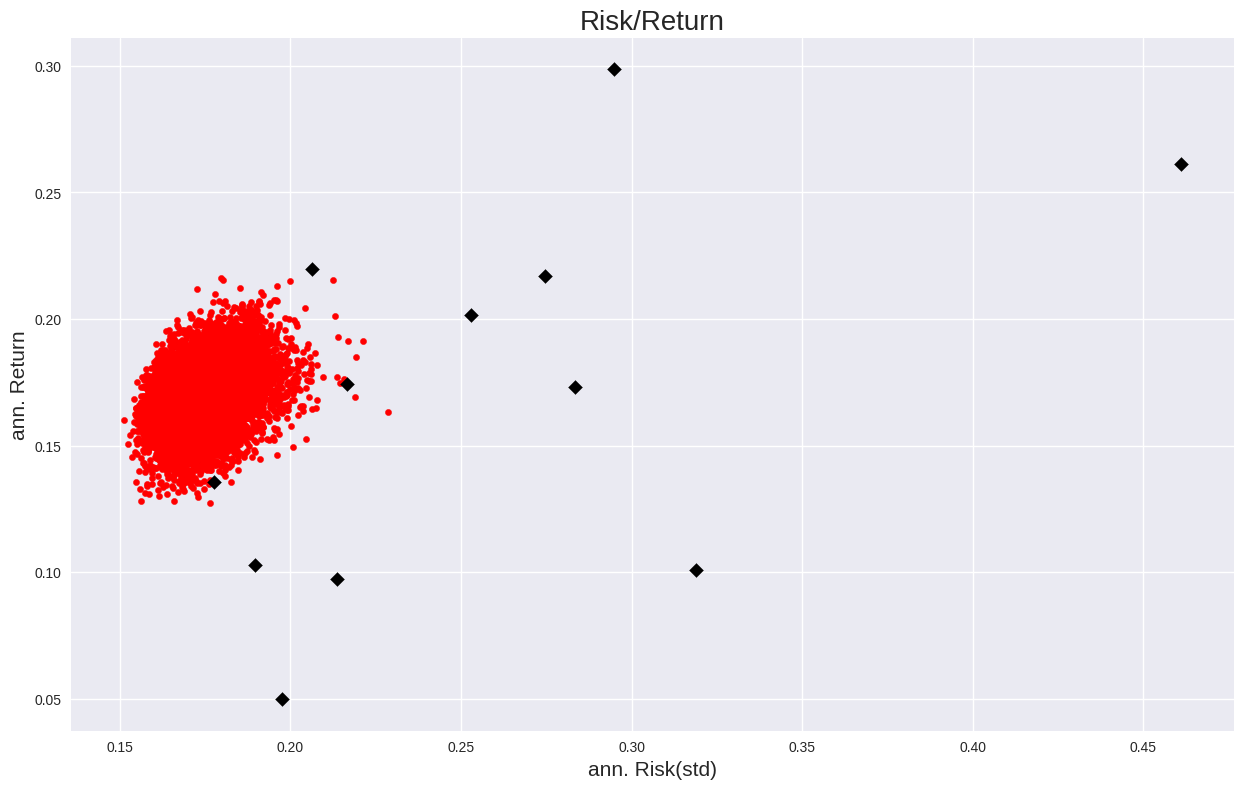

In [134]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [135]:
risk_free_return = 0.017
risk_free_risk = 0

In [136]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

In [137]:
summary

,Return,Risk
AX,0.26,0.46
CL,0.05,0.20
COST,0.22,0.21
DPZ,0.30,0.29
INTC,0.10,0.32
JPM,0.17,0.28
MCD,0.17,0.22
NKE,0.22,0.27
PG,0.10,0.19
SPY,0.14,0.18


In [138]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [139]:
summary

,Return,Risk,Sharpe
AX,0.26,0.46,0.53
CL,0.05,0.20,0.17
COST,0.22,0.21,0.98
DPZ,0.30,0.29,0.96
INTC,0.10,0.32,0.26
JPM,0.17,0.28,0.55
MCD,0.17,0.22,0.73
NKE,0.22,0.27,0.73
PG,0.10,0.19,0.45
SPY,0.14,0.18,0.67


In [140]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [141]:
port_summary.tail()

,Return,Risk,Sharpe
9995,0.16,0.17,0.85
9996,0.19,0.18,0.96
9997,0.17,0.17,0.91
9998,0.19,0.17,1.01
9999,0.17,0.16,0.98


In [142]:
port_summary.describe()

,Return,Risk,Sharpe
count,10000.00,10000.00,10000.00
mean,0.17,0.17,0.87
std,0.01,0.01,0.07
min,0.13,0.15,0.63
25%,0.16,0.17,0.83
50%,0.17,0.17,0.88
75%,0.18,0.18,0.92
max,0.22,0.23,1.13


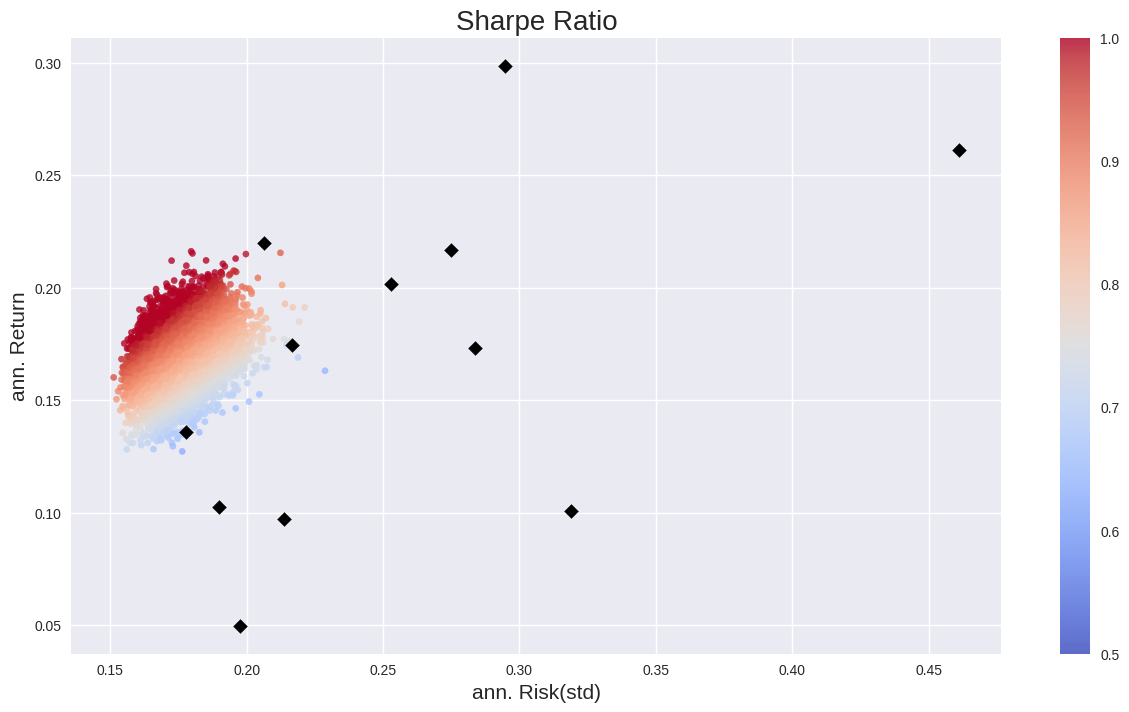

In [143]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20,
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.5, vmax = 1.00, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

In [144]:
msrp = port_summary.Sharpe.idxmax()
msrp

8129

In [145]:
port_summary.loc[msrp]

Return   0.21
Risk     0.17
Sharpe   1.13
Name: 8129, dtype: float64

In [146]:
msrp_w = weights[msrp, :]
msrp_w

array([7.88668423e-02, 1.17000198e-04, 1.92817337e-01, 2.15310603e-01,
       1.38018723e-02, 5.00678082e-02, 5.04896041e-02, 6.08731123e-02,
       7.10408076e-02, 9.37584090e-02, 1.51507918e-01, 2.13486868e-02])

In [147]:
pd.Series(index = stocks["Close"].columns, data = msrp_w)

AX     0.08
CL     0.00
COST   0.19
DPZ    0.22
INTC   0.01
JPM    0.05
MCD    0.05
NKE    0.06
PG     0.07
SPY    0.09
V      0.15
WMT    0.02
dtype: float64

In [148]:
opt_weights = np.array([1.09440739e-16, 1.87717305e-01, 6.21066456e-01,
       0.00000000e+00, 3.52446496e-17])

In [150]:
#pd.Series(index = stocks["Close"].columns, data = opt_weights)